In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= 'darkgrid')
import random , re , string
import nltk

import json
import pickle
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# ***PART 1***

In [ ]:
trainData = []

# Load data to file
trainData = pd.read_csv("/content/drive/MyDrive/AIML/LABS/NLP/Project 1/blogtext.csv")

print("Shape of Train set",trainData.shape)

Shape of Train set (681284, 7)


In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [ ]:
trainData.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
trainData.describe()

,id,age
count,6.812840e+05,681284.000000
mean,2.397802e+06,23.932326
std,1.247723e+06,7.786009
min,5.114000e+03,13.000000
25%,1.239610e+06,17.000000
50%,2.607577e+06,24.000000
75%,3.525660e+06,26.000000
max,4.337650e+06,48.000000


In [ ]:
trainData.describe(include='object')

,gender,topic,sign,date,text
count,681284,681284,681284,681284,681284
unique,2,40,12,2616,611652
top,male,indUnk,Cancer,"02,August,2004",urlLink
freq,345193,251015,65048,16544,445


In [ ]:
# missing data
trainData.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
from numpy import unique
list1=[]
# summarize the number of unique values in each column
for i in range(trainData.shape[1]):
    num = len(unique(trainData.iloc[:, i]))
    percentage = float(num) / trainData.shape[0] * 100
    if percentage < 1:
        list1.append(i)
        print('%d, %d, %.1f%%' % (i, num, percentage))

1, 2, 0.0%
2, 26, 0.0%
3, 40, 0.0%
4, 12, 0.0%
5, 2616, 0.4%


In [ ]:
for i in trainData.columns:
    print(f"unique {i} values :")
    print(f"{trainData[i].unique()}\n")

unique id values :
[2059027 3581210 3539003 ... 3561647 4260903 1713845]

unique gender values :
['male' 'female']

unique age values :
[15 33 14 25 17 23 37 26 24 27 45 34 41 44 16 39 35 36 46 42 13 38 43 40
 47 48]

unique topic values :
['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']

unique sign values :
['Leo' 'Aquarius' 'Aries' 'Capricorn' 'Gemini' 'Cancer' 'Sagittarius'
 'Scorpio' 'Libra' 'Virgo' 'Taurus' 'Pisces']

unique date values :
['14,May,2004' '13,May,2004' '12,May,20

In [ ]:
#check for Duplicate values
dups = trainData.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
dup_df = pd.DataFrame(trainData[dups])
dup_df

True


,id,gender,age,topic,sign,date,text
2310,589736,male,35,Technology,Aries,"05,August,2004",hey guys - i had the flu today - th...
3469,589736,male,35,Technology,Aries,"05,August,2004",
3578,589736,male,35,Technology,Aries,"05,August,2004",
3626,589736,male,35,Technology,Aries,"05,August,2004",
3627,589736,male,35,Technology,Aries,"05,August,2004",
...,...,...,...,...,...,...,...
679550,3446325,male,24,Advertising,Gemini,"25,May,2004","Ok, this is very cool. AISO GrepLaw, De..."
679551,3446325,male,24,Advertising,Gemini,"25,May,2004","Ok, this is very cool. AISO GrepLaw, De..."
679552,3446325,male,24,Advertising,Gemini,"25,May,2004","Ok, this is very cool. AISO GrepLaw, De..."
679553,3446325,male,24,Advertising,Gemini,"25,May,2004","Ok, this is very cool. AISO GrepLaw, De..."


In [ ]:
print("shape before dropping duplicates" , trainData.shape)
trainData.drop_duplicates(inplace=True)
print("shape after dropping duplicates" , trainData.shape)

shape before dropping duplicates (681284, 7)
shape after dropping duplicates (676598, 7)


We can observe that id and date not are useful in prediction..lets remove them

As data set is very huge...lets work with 100k records

In [ ]:
trainData.drop(['id','date'], axis=1, inplace=True)
trainData = trainData[:100000]
print("Shape of trainData", trainData.shape)

Shape of trainData (100000, 5)


In [ ]:
num_list = random.sample(range(len(trainData)), 10)
for i in num_list:
  print(trainData['text'][i])

       Last week marked the one year anniversary of the last week of my old job.  I would be lying if I said that I was devastated to leave that job. There are certainly some people I miss working with, but there are also some people I'm glad I don't ever have to deal with again, and the work itself... not so much the fun.  Perhaps it was because I extended myself more than I should have, maybe it was because I answered my work administered cell phone every time it rang, no matter what time it was, but after almost two years of being a company manager I couldn't bear the thought of booking another flight, prepping another apartment or listening to one more upset actor.  I started to crack at the end of May and finally by August I was on my way out. I was so eager to leave at that point that I didn't even have another job lined up and only two months of rent saved.  Probably not the best idea in the Bay Area, but I felt like I had no other choice.  The last show I worked on was one with

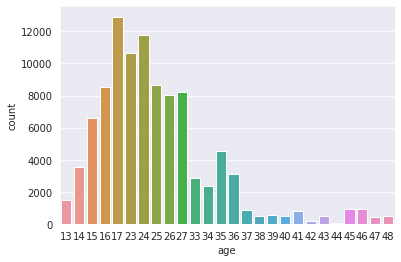

In [ ]:
sns.countplot(x=trainData['age'])

From above we can understand most blog authors are in age range of 14 to 36.
Very less blog authors of age 40+

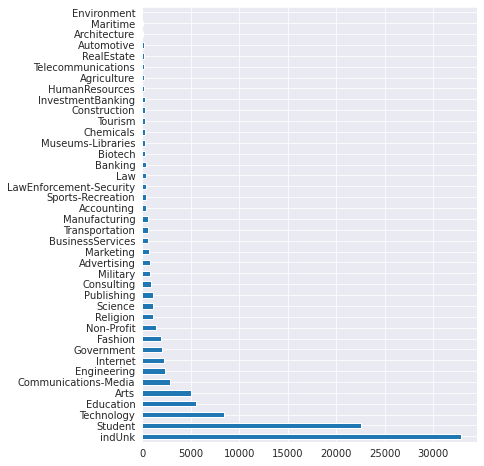

In [ ]:
plt.figure(figsize = (6, 8))
pd.value_counts(trainData['topic']).plot(kind="barh")
plt.show()

We can observe highest number of posts are on topics "indUnk" followed  by "student" and "Technology". Very less number of posts on "Maritime","environment" and "construction"

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
def clean_data(string):
  """
  cleaning data before vectorization
  """
  try:    
    string = re.sub(r'^http?:\/\/<>.*[\r\n]*', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    words = [w for w in words if not w in set(stopwords.words('english')) or not w.isalpha()]
    words = [wordnet_lemmatizer.lemmatize(w) for w in words]

    return " ".join(words)
  except:
    return ""

In [ ]:
trainData['text'][56182]

"             So, I've been playing for the last few weeks, and I've been trying to increase my bankroll. I keep a lot of my bankroll off of any individual poker site. Mostly it is in my bank account, cash, or Neteller. However, every time I would break the $1000 barrier online, I'd quickly go on a losing streak and be down around $750-$800. This happened 4 times in 3 weeks. So, this past week, I told myself I wouldn't let it happen again. I decided to play some $20 Sit-'n-Go tourneys. I did pretty well, only managed to win one, but had plenty of second and third place finishes. Before I knew it, I was more than above my bankroll's glass ceiling. So, lets hope this sticks.  I recently read a post online that kind of bothered me. A guy was asking for advice on how to play in a casino for the first time. A gentleman replied that he shouldn't raise too much before the flop since everyone sees the flop with any two cards and will likely make 2 pair to beat your top pair top kicker, or big 

In [ ]:
clean_data(trainData['text'][56182])

'playing last week trying increase bankroll keep lot bankroll individual poker site mostly bank account cash neteller however every time would break barrier online quickly go losing streak around happened time week past week told let happen decided play sit n go tourney pretty well managed win one plenty second third place finish knew bankroll glass ceiling let hope stick recently read post online kind bothered guy asking advice play casino first time gentleman replied raise much flop since everyone see flop two card likely make pair beat top pair top kicker big pair disagree loose game need raising hand least make chump put dead money play poker defeatist attitude going play aggressively know bad beat going happen play way way make serious long term profit constantly playing attitude something going go wrong accepting bad beat get angry however also play card best way possible make weaker hand pay play would bet top set board two suited flush might hit would insane go raising pre flop

In [ ]:
trainData['text'][2]

"           In het kader van kernfusie op aarde:  MAAK JE EIGEN WATERSTOFBOM   How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia  Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, like gold,' as it was missing. If anyone has the full text, please distribute. I am not responsible for the accuracy of this information. Converted to HTML by Dionisio@InfiNet.com 11/13/98. (Did a little spell-checking and some minor edits too.) Stolen from  urlLink http://my.ohio.voyager.net/~dionisio/fun/m...own-h-bomb.html  and reformatted the HTML. It now validates to XHTML 1.0 Strict. How to Build an H-Bomb Making and owning an H-bomb is the kind of challenge real Americans seek. Who wants to 

In [ ]:
clean_data(trainData['text'][2])

'het kader van kernfusie op aarde maak je eigen waterstofbom build h bomb ascott tartarus uwa edu au andrew scott newsgroups rec humor subject build h bomb humorous date feb gmt organization university western australia original file dated th november seemed transcript seven day article poorly formatted corrupted added text examine microscope malleable like gold missing anyone full text please distribute responsible accuracy information converted html dionisio infinet com little spell checking minor edits stolen urllink http ohio voyager net dionisio fun h bomb html reformatted html validates xhtml strict build h bomb making owning h bomb kind challenge real american seek want passive victim nuclear war little effort active participant bomb shelter loser want huddle together underground eating canned spam winner want push button making h bomb big step nuclear assertiveness training called taking charge sure enjoy risk heady thrill playing nuclear chicken introduction fed clamped progre

In [ ]:
trainData['clean_text'] = trainData['text'].apply(lambda x: clean_data(x))
trainData.head()

,gender,age,topic,sign,text,clean_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found page mb pdf file wait untill team l...
1,male,15,Student,Leo,These are the team members: Drewe...,team member drewes van der laag urllink mail r...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture url popups mean s...


In [ ]:
trainData['labels'] = trainData.apply(lambda x : [x['gender'],x['age'],x['topic'],x['sign']], axis=1)

In [ ]:
#drop  gender,age,topic & sign as we merged to labels column
trainData.drop(columns=['gender','age','topic','sign','text'], axis=1, inplace=True)

In [ ]:
trainData.head()

,clean_text,labels
0,info found page mb pdf file wait untill team l...,"[male, 15, Student, Leo]"
1,team member drewes van der laag urllink mail r...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture url popups mean s...,"[male, 33, InvestmentBanking, Aquarius]"


In [ ]:
#splitting X and Y
X = trainData['clean_text']
y = trainData['labels']

**Using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2),max_df=0.9,min_df=5)
X_cnt = vectorizer.fit_transform(X)
print(X_cnt)  # returns the row number and column number of cells which have 1 as value

  (0, 122017)	1
  (0, 86483)	1
  (0, 183680)	1
  (0, 156128)	1
  (0, 186938)	1
  (0, 81250)	1
  (0, 276549)	1
  (0, 271270)	1
  (0, 251004)	1
  (0, 135298)	1
  (0, 199300)	1
  (0, 135741)	1
  (0, 118515)	1
  (0, 86691)	1
  (0, 186939)	1
  (0, 276752)	1
  (0, 251072)	1
  (1, 251004)	1
  (1, 157561)	1
  (1, 274856)	1
  (1, 57956)	1
  (1, 271841)	3
  (1, 151141)	3
  (1, 294694)	1
  (1, 30550)	1
  :	:
  (99999, 187297)	1
  (99999, 155626)	1
  (99999, 30152)	2
  (99999, 266947)	1
  (99999, 108754)	1
  (99999, 225446)	1
  (99999, 244468)	1
  (99999, 10445)	1
  (99999, 253657)	1
  (99999, 240856)	1
  (99999, 74034)	1
  (99999, 10588)	1
  (99999, 125430)	1
  (99999, 225611)	1
  (99999, 188329)	1
  (99999, 227385)	1
  (99999, 141560)	1
  (99999, 213318)	1
  (99999, 250514)	1
  (99999, 31671)	1
  (99999, 253658)	1
  (99999, 244478)	1
  (99999, 198335)	3
  (99999, 100222)	1
  (99999, 31911)	1


In [ ]:
X_cnt[1]

<1x298244 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names()[0:10]

['aa',
 'aa meeting',
 'aaa',
 'aaaaaah',
 'aaaaah',
 'aaaaahhhhh',
 'aaaah',
 'aaaahhh',
 'aaaand',
 'aaah']

In [ ]:
label_counts=dict()

for labels in trainData.labels.values:
     for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [ ]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 409,
 'Advertising': 778,
 'Agriculture': 168,
 'Aquarius': 9118,
 'Architecture': 80,
 'Aries': 10609,
 'Arts': 5029,
 'Automotive': 124,
 'Banking': 344,
 'Biotech': 324,
 'BusinessServices': 620,
 'Cancer': 9147,
 'Capricorn': 8714,
 'Chemicals': 305,
 'Communications-Media': 2811,
 'Construction': 250,
 'Consulting': 937,
 'Education': 5545,
 'Engineering': 2317,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 8921,
 'Government': 2054,
 'HumanResources': 209,
 'Internet': 2231,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 367,
 'Leo': 8348,
 'Libra': 7290,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 725,
 'Military': 790,
 'Museums-Libraries': 308,
 'Non-Profit': 1377,
 'Pisces'

In [ ]:
y

0                        [male, 15, Student, Leo]
1                        [male, 15, Student, Leo]
2                        [male, 15, Student, Leo]
3                        [male, 15, Student, Leo]
4         [male, 33, InvestmentBanking, Aquarius]
                           ...                   
100832                   [male, 17, Student, Leo]
100833                   [male, 17, Student, Leo]
100834                   [male, 17, Student, Leo]
100835                   [male, 17, Student, Leo]
100836                   [male, 17, Student, Leo]
Name: labels, Length: 100000, dtype: object

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer(classes=sorted(label_counts.keys()))
y_mlb = mlb.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) [13, 14, 15, 16, 17, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48] will be ignored
  .format(sorted(unknown, key=str)))


In [ ]:
print(y_mlb[0:5])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]]


In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnt,y_mlb, random_state=2,test_size = 0.2)

print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (80000, 298244)
y_train shape:  (80000, 80)
x_test shape:  (20000, 298244)
y_test shape:  (20000, 80)


In [ ]:
X_train[0]

<1x298244 sparse matrix of type '<class 'numpy.int64'>'
	with 77 stored elements in Compressed Sparse Row format>

In [ ]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

**Using LogisticRegression with CountVectorizer**

In [ ]:
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
model = OneVsRestClassifier(lr)

model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
y_test[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def print_eval_scores():
   ## evaluating model performance via accuracy score
   print(" accuracy score : ", accuracy_score(y_test, y_pred_test))

   ## evaluating performance of the model using f1 score 
   print(" f1 score : " ,f1_score(y_test, y_pred_test,average='micro'))

   ## evaluating performance of the model using recall_score
   print(" recall_score : ", recall_score(y_test,y_pred_test,average='micro'))

   ## evaluating performance of the model using precision_score
   print(" precision_score : ", precision_score(y_test,y_pred_test,average='micro'))

In [ ]:
print_eval_scores()

 accuracy score :  0.13175
 f1 score :  0.5015437167443999
 recall_score :  0.38175
 precision_score :  0.7309017805858702


Got very less accuracy score i.e. 13% even though precision(percent of predictions) were correct is 73% But F1 score(correct positive predictions) is 50% only.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

In [ ]:
print("actuals")
print(mlb.inverse_transform(y_test)[0:5])
print("")
print("predicted")
print(mlb.inverse_transform(y_pred_test)[0:5])

actuals
[('Aries', 'Fashion', 'male'), ('Cancer', 'Student', 'male'), ('Sagittarius', 'indUnk', 'male'), ('Banking', 'Sagittarius', 'male'), ('Aries', 'Student', 'male')]

predicted
[('male',), ('Gemini', 'Student', 'female'), ('male',), ('male',), ('Student', 'male')]


working with **TFIDF** 

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.9,min_df=5 )
tfidf_vectorizer.fit(X)
X_tf = tfidf_vectorizer.transform(X)

In [ ]:
X_tf[0]

<1x298244 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_vectorizer.get_feature_names()[0:10]

['aa',
 'aa meeting',
 'aaa',
 'aaaaaah',
 'aaaaah',
 'aaaaahhhhh',
 'aaaah',
 'aaaahhh',
 'aaaand',
 'aaah']

In [ ]:
label_counts=dict()

for labels in trainData.labels.values:
     for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1


label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 409,
 'Advertising': 778,
 'Agriculture': 168,
 'Aquarius': 9118,
 'Architecture': 80,
 'Aries': 10609,
 'Arts': 5029,
 'Automotive': 124,
 'Banking': 344,
 'Biotech': 324,
 'BusinessServices': 620,
 'Cancer': 9147,
 'Capricorn': 8714,
 'Chemicals': 305,
 'Communications-Media': 2811,
 'Construction': 250,
 'Consulting': 937,
 'Education': 5545,
 'Engineering': 2317,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 8921,
 'Government': 2054,
 'HumanResources': 209,
 'Internet': 2231,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 367,
 'Leo': 8348,
 'Libra': 7290,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 725,
 'Military': 790,
 'Museums-Libraries': 308,
 'Non-Profit': 1377,
 'Pisces'

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer(classes=sorted(label_counts.keys()))
y_mlb = mlb.fit_transform(y)

In [ ]:
mlb.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Manufacturing',
       'Maritime', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications', 'Tourism',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tf,y_mlb, random_state=2,test_size = 0.2)

print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (80000, 298244)
y_train shape:  (80000, 80)
x_test shape:  (20000, 298244)
y_test shape:  (20000, 80)


**Using Naive Bayes**

In [ ]:
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=1.0)
model1 = OneVsRestClassifier(nb)
model1.fit(X_train, y_train)
y_pred_test = model1.predict(X_test)
print(y_pred_test[0:5])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

In [ ]:
print_eval_scores()

 accuracy score :  0.0111
 f1 score :  0.38370899739116454
 recall_score :  0.25861666666666666
 precision_score :  0.7431869342401456


Naive Bayes performed very poor. Got very less accuracy 1%.

In [ ]:
num_list = random.sample(range(len(y_test)), 5)

for i in num_list:
  print("actuals :" , mlb.inverse_transform(y_test)[i])
  print("predicted :", mlb.inverse_transform(y_pred_test)[i])
  print()

actuals : ('Capricorn', 'Student', 'female')
predicted : ('male',)

actuals : ('Advertising', 'Cancer', 'male')
predicted : ('Advertising', 'Cancer', 'male')

actuals : ('Cancer', 'female', 'indUnk')
predicted : ('male',)

actuals : ('Pisces', 'female', 'indUnk')
predicted : ('female',)

actuals : ('Libra', 'Publishing', 'male')
predicted : ('male',)



We got one lucky prediction :D Identified all correctly.

***Using LogisticRegression***

In [ ]:
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
model = OneVsRestClassifier(lr)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
print(y_pred_test[0:5])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]]


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

In [ ]:
print_eval_scores()

 accuracy score :  0.03135
 f1 score :  0.34489809466905663
 recall_score :  0.21646666666666667
 precision_score :  0.8480574600065296


Accuracy has been increased with Logistic regression and TF-IDF.
Percentage of postive cases we catch (Recall # 21.6%) is very low and correct positive preditions(F1 score# 34.5) are also very less

In [ ]:
num_list = random.sample(range(len(y_test)), 5)

for i in num_list:
  print("actuals :" , mlb.inverse_transform(y_test)[i])
  print("predicted :", mlb.inverse_transform(y_pred_test)[i])
  print()

actuals : ('Libra', 'female', 'indUnk')
predicted : ()

actuals : ('Manufacturing', 'Virgo', 'male')
predicted : ('male',)

actuals : ('Taurus', 'female', 'indUnk')
predicted : ('male',)

actuals : ('Aquarius', 'Marketing', 'female')
predicted : ('female',)

actuals : ('Sagittarius', 'female', 'indUnk')
predicted : ('female',)



**Using SVC**

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(penalty='l1', dual=False, loss='squared_hinge')
model2 = OneVsRestClassifier(svc)
model2.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l1',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
y_pred_test = model.predict(X_test)
print(y_pred_test[0:5])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]]


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

average=micro says the function to compute f1 by considering total true positives, false negatives and false positives (no matter of the prediction for each label in the dataset)

average=macro says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.

average=weighted says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.

average=samples says the function to compute f1 for each instance, and returns the average. Use it for multilabel classification.

Here are the evaluation scores for Micro average
f1 score :  0.34
recall_score :  0.21
precision_score :  0.84

Precision – What percent of your predictions were correct 
Recall – What percent of the positive cases did you catch 
F1 score – What percent of positive predictions were correct 
support is the number of occurence of the given class in your dataset

For class 79, We have 83% predictions(Precision) correct and able to caught 59%(Recall) positive cases correctly and 69%(F1 Score) of postive predictions are correct

Support numbers- For every 60000 occurences we have 10823 occurances for class 79.

Overall accuracy is 31%

In [ ]:
#Micro average Evaluation 
print_eval_scores()

 accuracy score :  0.03135
 f1 score :  0.34489809466905663
 recall_score :  0.21646666666666667
 precision_score :  0.8480574600065296


SVC and LR - both worked very similar. Got similar evaluaiton scores

In [ ]:
num_list = random.sample(range(len(y_test)), 5)

for i in num_list:
  print("actuals :" , mlb.inverse_transform(y_test)[i])
  print("predicted :", mlb.inverse_transform(y_pred_test)[i])
  print()

actuals : ('Capricorn', 'female', 'indUnk')
predicted : ('female',)

actuals : ('Gemini', 'indUnk', 'male')
predicted : ('male',)

actuals : ('Capricorn', 'Engineering', 'male')
predicted : ('male',)

actuals : ('Sagittarius', 'female', 'indUnk')
predicted : ('female', 'indUnk')

actuals : ('Aquarius', 'female', 'indUnk')
predicted : ('female',)



# **PART 2**

In [4]:
import os
os.chdir("/content/drive/MyDrive/AIML/LABS/NLP/Project2")

In [5]:
data_file = open('GL Bot.json').read()
intents = json.loads(data_file)

In [ ]:
intents

{'intents': [{'context_set': '',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'tag': 'Intro'},
  {'context_set': '',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'tag': 'Exit'},
  {'context_set': '',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able to understa

In [ ]:
intents['intents'][0]['patterns']

['hi',
 'how are you',
 'is anyone there',
 'hello',
 'whats up',
 'hey',
 'yo',
 'listen',
 'please help me',
 'i am learner from',
 'i belong to',
 'aiml batch',
 'aifl batch',
 'i am from',
 'my pm is',
 'blended',
 'online',
 'i am from',
 'hey ya',
 'talking to you for first time']

In [ ]:
intents['intents'][0]['tag']

'Intro'

In [ ]:
intents['intents'][0]['responses']

['Hello! how can i help you ?']

In [ ]:
intents['intents'][5]['patterns']

['what is your name',
 'who are you',
 'name please',
 'when are your hours of opertions',
 'what are your working hours',
 'hours of operation',
 'working hours',
 'hours']

In [ ]:
intents['intents'][5]['tag']

'Bot'

In [ ]:
intents['intents'][5]['responses']

['I am your virtual learning assistant']

In [6]:
words = []
documents = []
classes = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [7]:
# lemmatize, lower each word and remove duplicates

wordnet_lemmatizer = WordNetLemmatizer()
words = [wordnet_lemmatizer.lemmatize(w.lower()) for w in words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
158 unique lemmatized words ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimi

In [8]:

train = []
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [wordnet_lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    train.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(train)
train = np.array(train)
# create train and test lists. X - patterns, Y - intents
X = np.array(list(train[:,0]))
y = np.array(list(train[:,1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [9]:
print("X shape is " , X.shape)
print("y shape is " , y.shape)

X shape is  (128, 158)
y shape is  (128, 8)


In [ ]:
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(128, input_shape=(len(X[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y[0]), activation='softmax'))
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
adam = optimizers.Adam(lr=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#fitting and saving the model 
hist = model.fit(X, y, epochs=200, batch_size=5, verbose=1)

Epoch 1/200
26/26 [==============================] - 1s 2ms/step - loss: 1.9995 - accuracy: 0.1406 
Epoch 2/200
26/26 [==============================] - 0s 2ms/step - loss: 1.7269 - accuracy: 0.3594
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 1.3887 - accuracy: 0.5312
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 1.0638 - accuracy: 0.6016
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7891
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8516
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7969
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8750
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.9062
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9219
Epoch 11

In [ ]:
model.save('chat_model.h5')
!ls

 chat_model.h5	'GL Bot.json'


In [10]:
from keras.models import load_model
model = load_model('chat_model.h5')

Input data to bot also has to be processed in the same way how we train the data

In [40]:
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def pre_process_data(sentence, words):
    sent_words = nltk.word_tokenize(sentence)
    sent_words = [wordnet_lemmatizer.lemmatize(word.lower()) for word in sent_words]

    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sent_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = pre_process_data(sentence, words)
    train=p.reshape(158,1)
    train=np.expand_dims(p,axis=0)
    res = model.predict(train)[0]
    thrshld = 0.2
    results = [[i,r] for i,r in enumerate(res) if r>thrshld]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "prob": str(r[1])})
    return return_list

In [36]:
def getResponse(ints, intents_json):  
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']  
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(text):
    idx = predict_class(text, model)
    res = getResponse(idx, intents)
    print("Bot:",res)

In [29]:
def chat_bot():
    print("Bot: Hi there !! How can I help you today? (type quit to stop)!")
    while(True):
      user_response = input("You: ")
      user_response = user_response.lower()
      if(user_response == 'quit'):
         break
      chatbot_response(user_response)

In [42]:
chat_bot()

Bot: Hi there !! How can I help you today? (type quit to stop)!
You: hiiii
Bot: Hello! how can i help you ?
You: olympus link
Bot: Link: Olympus wiki
You: what is softmax
Bot: Link: Neural Nets wiki
You: machine learning means
Bot: Link: Machine Learning wiki 
You: thanks for link
Bot: I hope I was able to assist you, Good Bye
You: you are smart
Bot: Please use respectful words
You: you are stupid
Bot: Please use respectful words
You: very bad response
Bot: Tarnsferring the request to your PM
You: thanks bye
Bot: I hope I was able to assist you, Good Bye
You: quit
